In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 6: Decision trees

In [4]:
# Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform
# both classification and regression tasks, and even multioutput tasks. They are
# very powerful algorithms, capable of fitting complex datasets.

In [3]:
# implementing ..
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
# idk about this part

# # You can visualize the trained Decision Tree by first using the export_graphviz()
# # method to output a graph definition file called iris_tree.dot:
# from sklearn.tree import export_graphviz
# from PIL import Image
# # export_graphviz(
# #     tree_clf,
# #     out_file=image_path("iris_tree.dot"),
# #     feature_names=iris.feature_names[2:],
# #     class_names=iris.target_names,
# #     rounded=True,
# #     filled=True
# # )

# # To support both python 2 and python 3
# from __future__ import division, print_function, unicode_literals

# # Common imports
# import numpy as np
# import os

# # to make this notebook's output stable across runs
# np.random.seed(42)

# # To plot pretty figures
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# # Where to save the figures
# PROJECT_ROOT_DIR = "D:\material\Current"
# CHAPTER_ID = "decision_trees"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

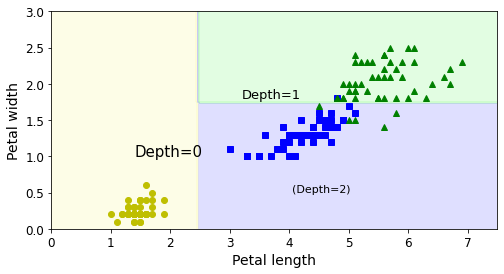

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

axes=[0, 7.5, 0, 3]
# x1s = np.linspace(axes[0], axes[1], 100)
# x2s = np.linspace(axes[2], axes[3], 100)
# x1, x2 = np.meshgrid(x1s, x2s)
# X_new = np.c_[x1.ravel(), x2.ravel()]
# y_proba = tree_clf.predict_proba(X_new).reshape(x1.shape)
# plt.contourf(x1,x2,y_proba)

# plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
# plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
# plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# save_fig("decision_tree_decision_boundaries_plot")

plt.show()

In [32]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

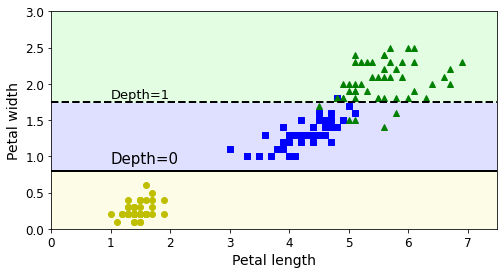

In [35]:
# we just changed the max_depth parameter
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

# save_fig("decision_tree_instability_plot")
plt.show()

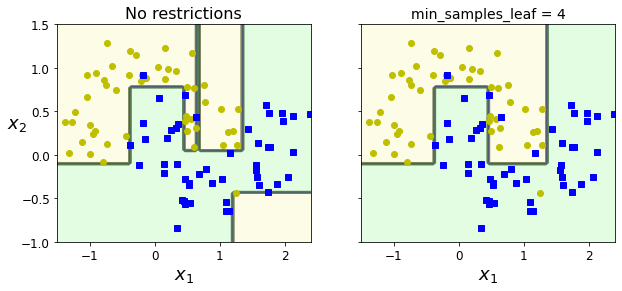

In [37]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

# save_fig("min_samples_leaf_plot")
plt.show()

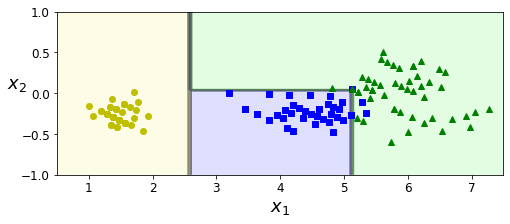

In [38]:
# rotating the dataset
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

In [44]:
# check at the directory mentioned above
# check out page->179 for the diagram
# One of the many qualities of Decision Trees is that they require
# very little data preparation. In particular, they don’t require feature
# scaling or centering at all.

In [46]:
# white box models -- decision trees... 
# black box models -- neural network
# difference is on page-> 181
# simple diff is that we don't know in black box what contributed to the prediction whereas
# in while box models like decision trees we know as it is simply defined.. as you see in image.. se page->179

In [48]:
tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]])

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

## the cart training algorithm

In [50]:
# page->182

In [52]:
# Scikit-Learn can speed up
# training by presorting the data (set presort=True), but this slows down training considerably
# for larger training sets.
# page->183

# So should you use Gini impurity or entropy? The truth is, most of the time it does not
# make a big difference: they lead to similar trees. Gini impurity is slightly faster to
# compute, so it is a good default. However, when they differ, Gini impurity tends to
# isolate the most frequent class in its own branch of the tree, while entropy tends to
# produce slightly more balanced trees.5
# page->184

## regularization hyperparameters

In [56]:
# max_depth .. when set None means unlimited.. 
# reducing max_depth will regularize the model and thus reduce the risk of overfitting

# min_samples_leaf(the minimum no of samples a leaf node must have)

#min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction 
# of the total number of weighted instances)

# max_leaf_nodes (maximum number of leaf nodes), and max_features
# (maximum number of features that are evaluated for splitting at each node). Increasing
# min_* hyperparameters or reducing max_* hyperparameters will regularize the
# model.

# regression

In [39]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

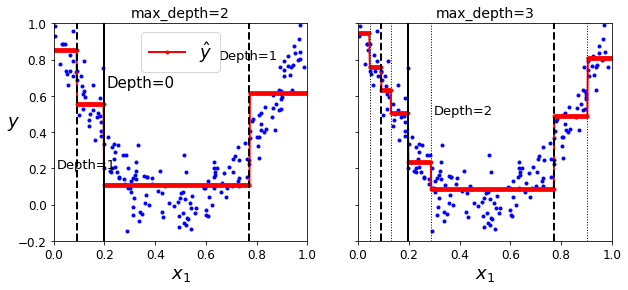

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

# save_fig("tree_regression_plot")
plt.show()

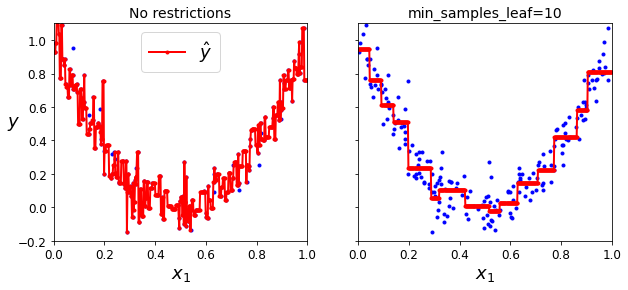

In [43]:
# I mean I don't think decesion trees are good for regression task 

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

# save_fig("tree_regression_regularization_plot")
plt.show()

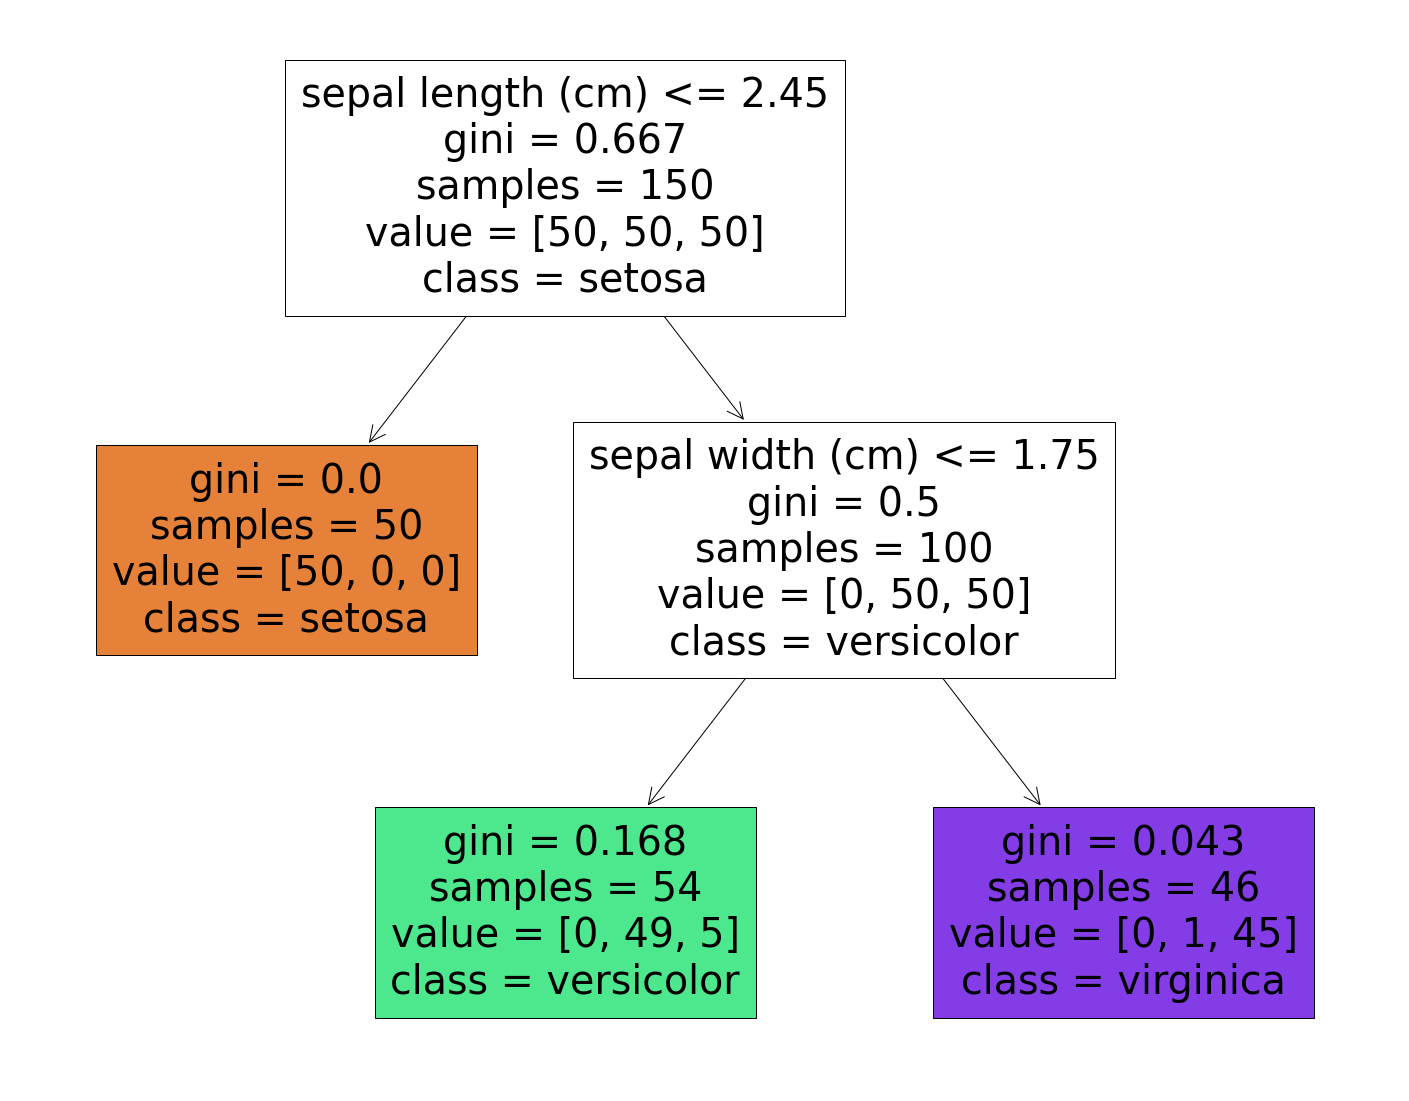

In [63]:
# for visualisation
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
# the above one is for iris one ig... 

In [64]:
# for decision tree of the regression one page->186

In [65]:
# Just like for classification tasks, Decision Trees are prone to overfitting when dealing
# with regression tasks. Without any regularization (i.e., using the default hyperparameters),
# you get the predictions on the left of Figure 6-6. It is obviously overfitting
# the training set very badly. Just setting min_samples_leaf=10 results in a much more
# reasonable model,
# page->187

# More generally, the main issue with Decision Trees is that they are very sensitive to
# small variations in the training data. For example, if you just remove the widest Iris-
# Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide)
# and train a new Decision Tree, you may get the model represented in Figure 6-8. As
# you can see, it looks very different from the previous Decision Tree (Figure 6-2).
# Actually, since the training algorithm used by Scikit-Learn is stochastic6 you may
# get very different models even on the same training data (unless you set the
# random_state hyperparameter).

# Random Forests can limit this instability by averaging predictions over many trees, as
# we will see in the next chapter.